In [1]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, TTreeReader, TTreeReaderValue
import copy
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/06


In [2]:
h_m_jj = TH1F("mjj","mjj",100,0,3000)
h_m_jjj = TH1F("mjjj","mjjj",100,0,6000)
h_BDT = TH1F("BDT","BDT",100,0,1)
h_isMatched = TH1F("isMatch","isMatch",5,0,5)
file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML/Res1ToRes2GluTo3Glu_M1-3000_R-0p3_selection.root")
file.ls()
tree = file.Get("Events")
print(tree.GetEntries())
variable2use = [i.GetName() for i in tree.GetListOfBranches()]
print(variable2use)

33513
['dijet_eta', 'dijet_phi', 'dR_jj', 'dEta_jj', 'dPhi_jj', 'jet_eta_0', 'jet_phi_0', 'jet_ptoverm_0', 'jet_eta_1', 'jet_phi_1', 'jet_ptoverm_1', 'jet_eta_2', 'jet_phi_2', 'jet_ptoverm_2', 'dR_jj_j', 'dEta_jj_j', 'dPhi_jj_j', 'jet_ptoverM_0', 'jet_ptoverM_1', 'jet_ptoverM_2', 'dijet_ptoverM', 'M_jjj', 'm_jj', 'score_BDT', 'isMatched']
TFile**		/home/xyan13/Trijet/TrijetAna/TrijetAna/ML/Res1ToRes2GluTo3Glu_M1-3000_R-0p3_selection.root	
 TFile*		/home/xyan13/Trijet/TrijetAna/TrijetAna/ML/Res1ToRes2GluTo3Glu_M1-3000_R-0p3_selection.root	
  KEY: TTree	Events;1	Events


In [3]:
count = 0
for event in tree:
    if event.isMatched == 3:
        count += 1
    if event.score_BDT >= 0.7:
        h_m_jj.Fill(event.m_jj)
        h_m_jjj.Fill(event.M_jjj)
        h_BDT.Fill(event.score_BDT)
        h_isMatched.Fill(event.isMatched)
print(h_m_jj.GetEntries())
print(count)

21409.0
14472


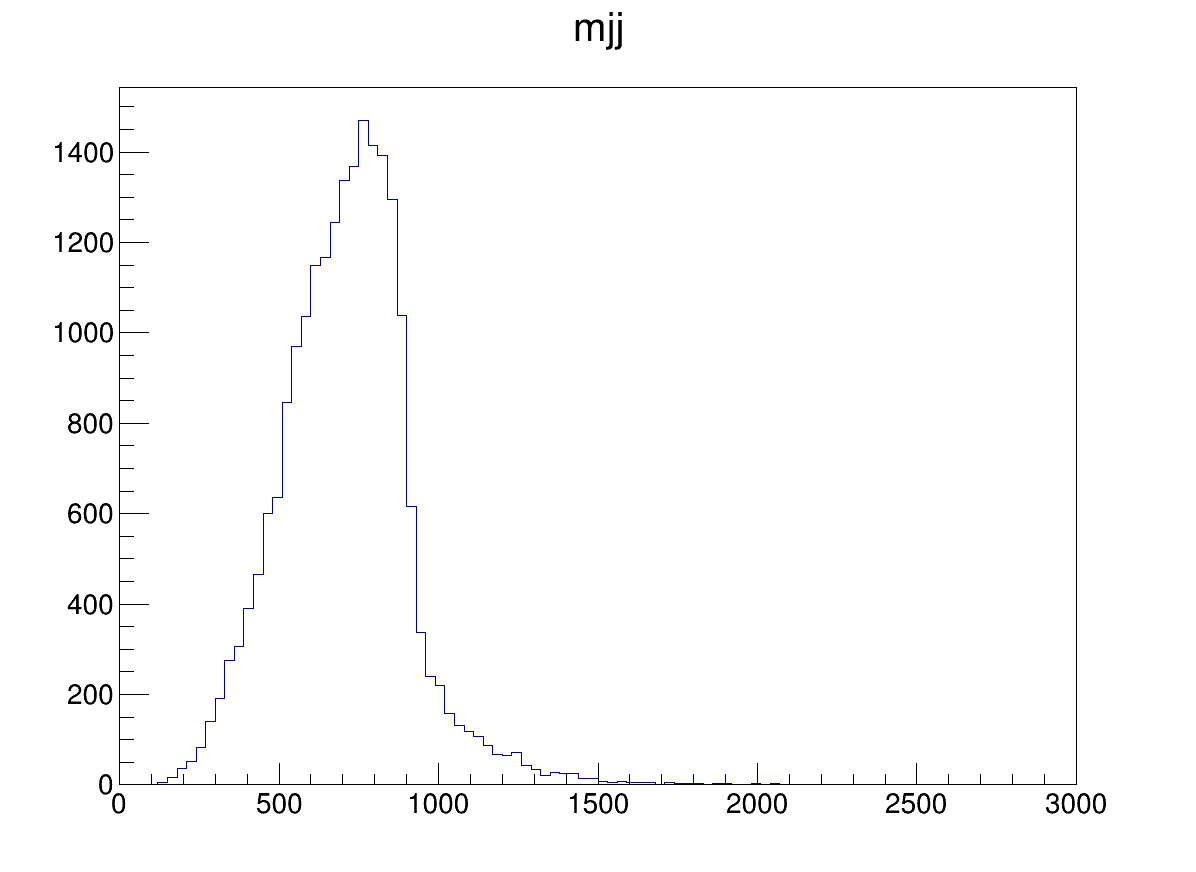

In [4]:
import math
ROOT.disableJSVis()
c = TCanvas("c","",1200,900)
c.cd()
h_m_jj.Draw()
c.Draw()

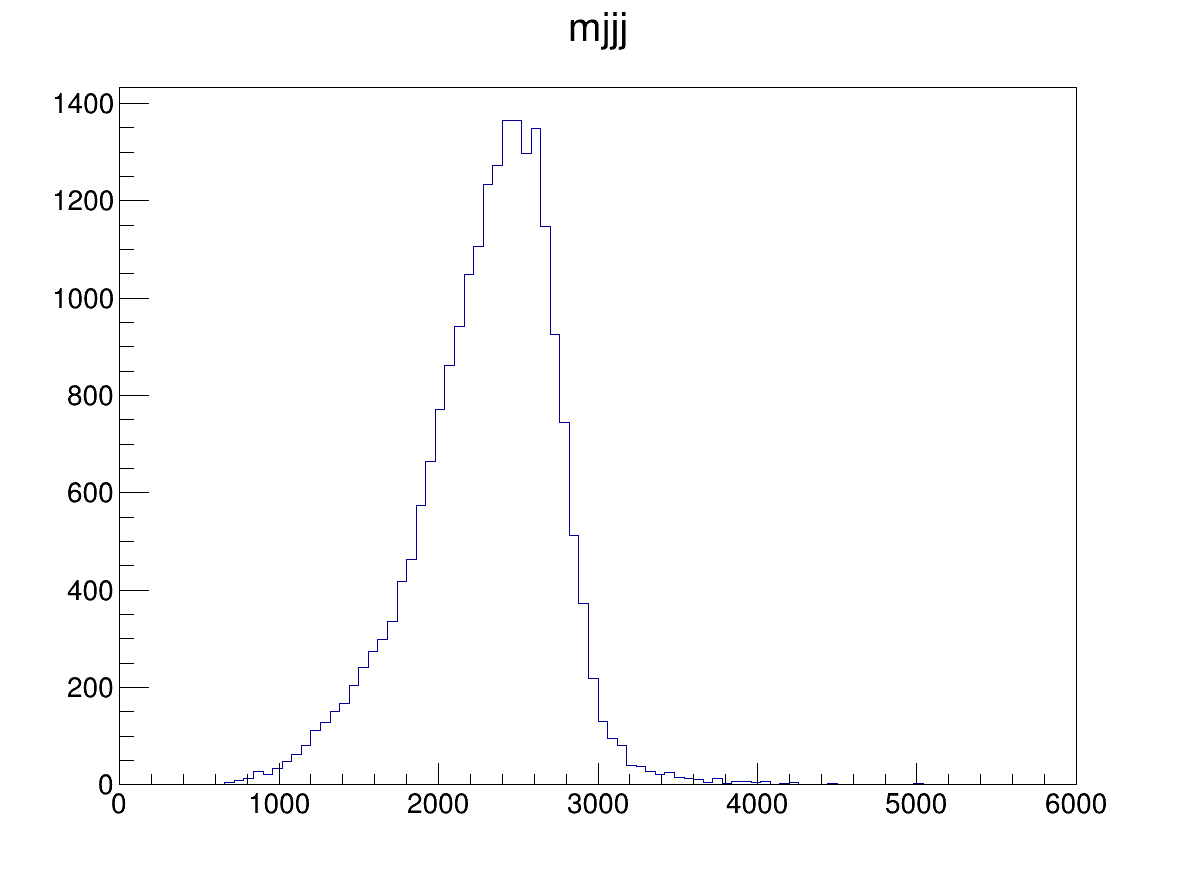

In [5]:
c1 = TCanvas("c1","",1200,900)
c1.cd()
h_m_jjj.Draw()
c1.Draw()

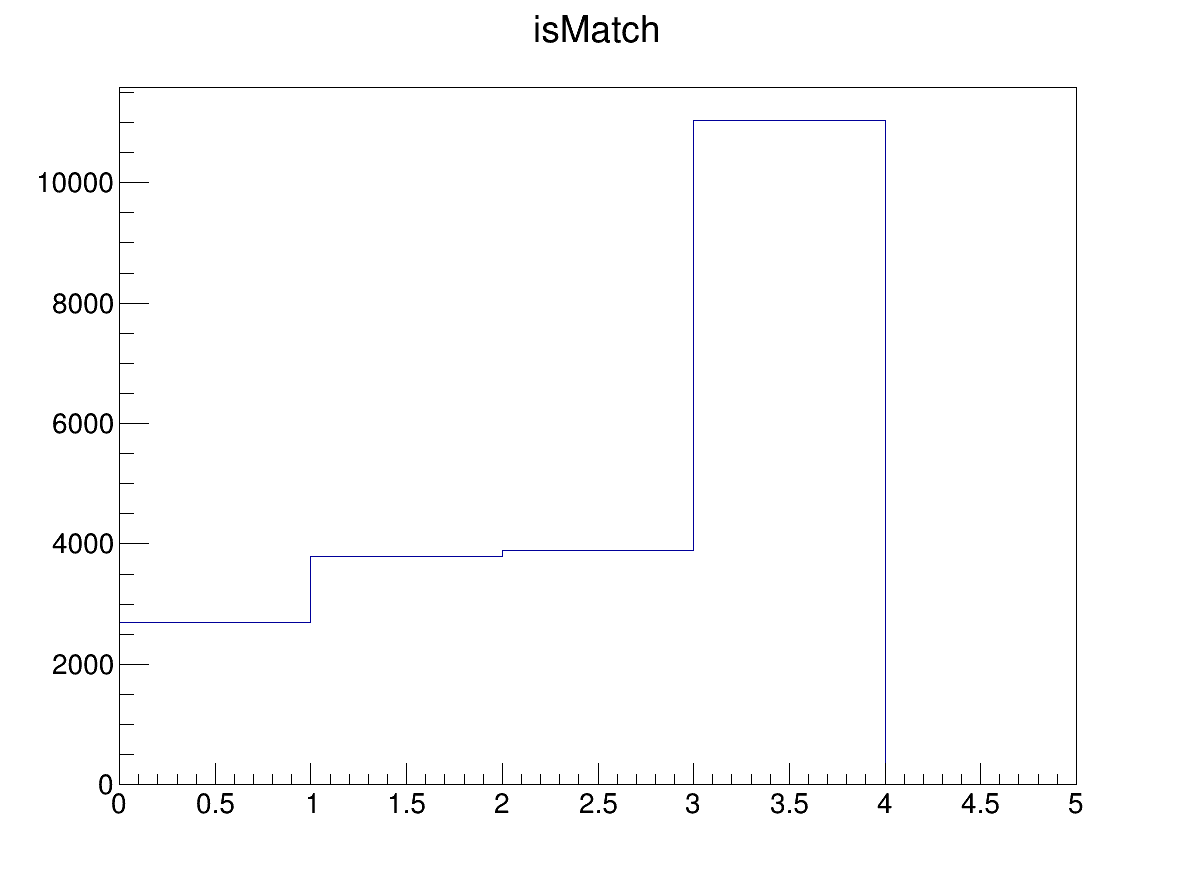

In [6]:
c2 = TCanvas("c2","",1200,900)
c2.cd()
h_isMatched.Draw()
c2.Draw()